## Table of Contents
> - [Introduction](#intro)
> - [Objective](#objective)
> - [Data Gathering](#data_gathering)
> - [Part I - Twitter Archive](#twitter_archive)
> - [Part II - Image Predictions](#image_predictions)
> - [Part III - Tweet Json](#tweet_json)
> - [Data Assessing](#data_assessing)
> - [Data Cleaning](#data_cleaning)
> - [Data Analysis and Visualiation](#data_analysis_visualization)

### Introduction 

> Real-world data rarely comes clean. Using Python and its libraries, data will be gathered from a variety of sources and in a variety of formats to assess its quality and tidiness, then clean it. This is called data wrangling.

> The dataset to be wrangled, analyzed and visualized is the tweet archive of Twitter user @dog_rates, also known as `WeRateDogs`. `WeRateDogs` is a Twitter account with over 4 million followers that rates people's dogs with a humorous comment about the dog. 

### Objectives

>  The objective of this project is to wrangle and clean `WeRateDogs` Twitter data to create interesting analyses and visualizations.

### Data Gathering

> The `WeRateDogs` Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything.
A csv file of the `WeRateDogs` Twitter archive containing rating, dog name, and dog "stage" that has been exracted programmatically and filtered for tweets with ratings only will be gathered.

> A tsv file of the image predictions per dog will also be gathered. This file contains a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponding to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

> Additional data was gathered from Twitter's API to obtain the retweet count and favorite count, these are two notable column omitted from the csv file. Using `WeRateDogs` Twitter archive and specifically the tweet IDs within it, Twitter's API  will be queried and this data will be gathered for all 5000+ tweets.

In [1]:
# importing all required libraries

import pandas as pd
import numpy as np
import requests
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tweepy
import time
import json

### Part I - Twitter Archive

> This is a csv file of the `WeRateDogs` Twitter archive which contains the rating, dog name, and dog "stage" for all tweets with ratings only.

In [2]:
# importing and opening the twitter archive dataset into a dataframe

archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Part II - Image Predictions

> This is a tsv file containing only the top three image predictions alongside each tweet ID, image URL, and the image number. This file is hosted on `Udacity's` server and will be downloaded progranmmatically via using the `Requests` library. After downloading, the dataset will be imported into a dataframe.

In [3]:
# creating a folder to store the downloaded file

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# Downloading the file via its url

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
# To save the downloaded file:

with open ('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
# Importing the saved file into a dataframe

image_df = pd.read_csv('image_predictions.tsv', sep = '\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Part III - Twitter API

> Twitter's API will be queried to obtain the retweet count and favorite count columns.

In [7]:
# Importing and opening the twitter keys csv file

keys = pd.read_csv('Twitter keys.csv')

# obtaining access to twitter API via keys
consumer_key = keys['API KEY'][0]
consumer_secret = keys['API Secret Key'][0]
access_token = keys['Access Token'][0]
access_secret = keys['Access Secret Key'][0]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [8]:
# Querying twitter API via tweet id
count = 0
fails_dict = {}
start = time.time()

## Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as file:
    for tweet_id in archive_df['tweet_id']:
        count += 1      
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = time.time()
print(end - start) 
print(fails_dict)

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Fail
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success

Rate limit reached. Sleeping for: 130


Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Suc

Rate limit reached. Sleeping for: 94


Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


In [9]:
## Save the retweet and favorite counts for each tweet ID in a new pandas DataFrame

json_df = []
with open('tweet_json.txt', 'r') as json_f:
    for line in json_f:
        json_data  = json.loads(line)
        json_df.append({'tweet_id' : json_data['id'],
                       'retweet_count' : json_data['retweet_count'],
                       'favorite_count' : json_data['favorite_count']})
        
        
api_df = pd.DataFrame(json_df, columns=['tweet_id', 'retweet_count', 'favorite_count'])


In [10]:
# opening the api dataframe
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7549,35697
1,892177421306343426,5594,30867
2,891815181378084864,3705,23207
3,891689557279858688,7730,38992
4,891327558926688256,8330,37246


### Data Assessing

> The gathered data is assessed (visually and programmatically) for quality and tidiness issues per dataframe.

> #### Twitter Archive
>> ##### Visual Assessment

In [11]:
# opening the archive dataframe 
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


>> ##### Programmatic Assessment

In [12]:
# Viewing information about the data
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# Viewing the first 5 rows of the dataset
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
# Computing the total number of null rows
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
# Computing the descriptive statistics of the dataframe
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
# Checking for duplicate ids
sum(archive_df.tweet_id.duplicated())

0

In [17]:
# Checking for duplicate rows in the entire dataframe
sum(archive_df.duplicated())

0

In [18]:
# Computing value counts for each unique value in the denominator column
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
# Computing value counts for each unique value in the numerator column
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
# Checking for the dog names 
list(archive_df.name.unique())

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Terrance',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Coco',
 'Jed',
 'Sebastian',
 'Walter',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Dawn',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'quite',
 'Dewey',
 'Scout',
 'Gizmo',
 'Cooper',
 'Harold',
 'Shikha',
 'Jamesy',
 'Lili',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 '

In [21]:
# Checking through samples of the retweet status id column 
archive_df.retweeted_status_id.sample(10)

1293             NaN
1046             NaN
972              NaN
1236             NaN
285     8.389060e+17
1664             NaN
1468             NaN
2075             NaN
27               NaN
1804             NaN
Name: retweeted_status_id, dtype: float64

In [22]:
# Checking through samples of the retweet status user id column 
archive_df.retweeted_status_user_id.sample(10)

1508             NaN
928              NaN
2070             NaN
989              NaN
1972             NaN
1520             NaN
1593             NaN
627     4.196984e+09
721              NaN
340     4.196984e+09
Name: retweeted_status_user_id, dtype: float64

In [23]:
# Checking through samples of the retweet status timestamp column 
archive_df.retweeted_status_timestamp.sample(10)

1824                          NaN
182     2017-03-23 00:18:10 +0000
826     2016-03-07 18:09:06 +0000
2002                          NaN
394                           NaN
1169                          NaN
1593                          NaN
1416                          NaN
398                           NaN
1106                          NaN
Name: retweeted_status_timestamp, dtype: object

In [24]:
# Computing the value count for each unique dog name
archive_df.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Jennifur      1
Kollin        1
Lulu          1
Cupid         1
Gabby         1
Name: name, Length: 957, dtype: int64

In [25]:
# Checking through the datatype for each column in the dataframe
archive_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [26]:
# Checking the datatype for the timestamp column
type(archive_df.timestamp[0])

str

In [27]:
# Checking through a sample of the timestamp column
archive_df.timestamp.sample(5)

555     2016-11-29 20:08:52 +0000
2217    2015-11-22 20:37:34 +0000
1284    2016-03-12 02:28:06 +0000
246     2017-03-25 16:45:08 +0000
1478    2016-01-31 00:25:18 +0000
Name: timestamp, dtype: object

In [28]:
# Checking throught the text column of the dataframe
archive_df.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [29]:
# Comparing the rating for tweet ids based on what was recorded in the text column for each dog

print(archive_df[archive_df['tweet_id'] == 810984652412424192].text.values)
archive_df[archive_df['tweet_id'] == 810984652412424192]

['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [30]:
print(archive_df[archive_df['tweet_id'] == 835246439529840640].text.values)
archive_df[archive_df['tweet_id'] == 835246439529840640]

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [31]:
print(archive_df[archive_df['tweet_id'] == 838150277551247360].text.values)
archive_df[archive_df['tweet_id'] == 838150277551247360]

['@markhoppus 182/10']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None


In [32]:
print(archive_df[archive_df['tweet_id'] == 835152434251116546].text.values)
archive_df[archive_df['tweet_id'] == 835152434251116546]

["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None


In [33]:
print(archive_df[archive_df['tweet_id'] == 786709082849828864].text.values)
archive_df[archive_df['tweet_id'] == 786709082849828864]

["This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [34]:
print(archive_df[archive_df['tweet_id'] == 749981277374128128].text.values)
archive_df[archive_df['tweet_id'] == 749981277374128128]

["This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


> #### Image Predictions Data
>> Visual Assessment

In [35]:
# Opening the image predictions dataframe
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


>> Programmatic Assessment

In [36]:
# Viewing the first 5 rows of the dataset
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
# Viewing a sample of the dataframe
image_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
950,704859558691414016,https://pbs.twimg.com/media/CcgqBNVW8AE76lv.jpg,1,pug,0.284428,True,teddy,0.156339,False,mitten,0.138915,False
963,705975130514706432,https://pbs.twimg.com/media/CcwgjmuXIAEQoSd.jpg,1,Staffordshire_bullterrier,0.587764,True,American_Staffordshire_terrier,0.281429,True,bull_mastiff,0.094798,True
920,701952816642965504,https://pbs.twimg.com/media/Cb3WXMUUMAIuzL8.jpg,1,toy_poodle,0.331707,True,miniature_poodle,0.272485,True,standard_poodle,0.169415,True
1619,802624713319034886,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
500,675845657354215424,https://pbs.twimg.com/media/CWEWClfW4AAnqhG.jpg,1,pug,0.883952,True,Boston_bull,0.011057,True,French_bulldog,0.009840,True
1633,805932879469572096,https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg,1,Norwegian_elkhound,0.657967,True,keeshond,0.319136,True,Leonberg,0.007947,True
1401,768855141948723200,https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg,1,chow,0.720219,True,Brabancon_griffon,0.058365,True,Rottweiler,0.055114,True
422,674051556661161984,https://pbs.twimg.com/media/CVq2UHwWEAAduMw.jpg,1,Shih-Tzu,0.179777,True,badger,0.160580,False,three-toed_sloth,0.132154,False
227,670374371102445568,https://pbs.twimg.com/media/CU2l7yvXAAUyYIJ.jpg,1,English_springer,0.974936,True,English_setter,0.011661,True,cocker_spaniel,0.002689,True
1013,709556954897764353,https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg,2,golden_retriever,0.790026,True,kuvasz,0.105031,True,Labrador_retriever,0.087051,True


In [38]:
# Viewing information about the dataframe
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [39]:
# Viewing the last 20 rows
image_df.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [40]:
# Checking through the datatype for each column in the dataframe
image_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [41]:
# Computing the total number of null rows
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [42]:
# Checking for duplicate ids
sum(image_df.tweet_id.duplicated())

0

In [43]:
# Computing the descriptive statistics of the data
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Twitter API Data
>> Visual Assessment

In [44]:
# Opening the image predictions dataframe
api_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7549,35697
1,892177421306343426,5594,30867
2,891815181378084864,3705,23207
3,891689557279858688,7730,38992
4,891327558926688256,8330,37246
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,126,265
2328,666033412701032449,39,111
2329,666029285002620928,41,120


>> Programmatic Assessment

In [45]:
# Viewing a sample of the dataframe
api_df.sample(10)

,tweet_id,retweet_count,favorite_count
132,865718153858494464,5180,24179
272,838921590096166913,2010,10989
976,747963614829678593,2101,5705
671,787717603741622272,2783,10315
356,828408677031882754,1278,7637
548,802265048156610565,1382,6800
1106,729113531270991872,310,1839
1369,700029284593901568,575,2041
2023,671511350426865664,661,1504
2275,667062181243039745,48,206


In [46]:
# Checking for duplicate rows in the entire dataframe
sum(api_df.duplicated())

0

In [47]:
# Computing the total number of null rows  
api_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [48]:
# Viewing information about the data
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [49]:
# Checking for columns shared across all three dataframes to be used in merging
all_columns = pd.Series(list(archive_df) + list(image_df) + list(api_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

> #### DATA  QUALITY ISSUES
> * Some rows with retweets identified by the non-null values in the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns of the `Twitter archive` dataframe.
> * Duplicate and undefined Dog names (such as `None`, `a`, `the`) in the name column of the `Twitter archive` dataframe.
> * Timestamp column is a string instead of datetime and has unnecessary digits (`+0000`) in the `Twitter archive` dataframe.
> * Incorrect ratings in some rows and incorrect decimal values extracted for rating numerator.  
> * Ratings numerator and denominator are integer instead of float data type in the `Twitter archive` dataframe.
> * The calculated rating column using both the numerator and denominator is missing in the `Twitter archive` dataframe.
> * Predicted dog breed in p1, p2 and p3 columns of the `Image prediction` dataframe have different letter casings and underscore in breed names.
> * Tweet ID is an integer datatype instead of a string in `Twitter archive`, `Image prediction` and  `API` dataframe.
> * Columns not relevant anymore to analysis (in_reply_to_status_id, in_reply_to_users_id, retweeted_status_id, expanded_urls, source, rating_numerator, rating_denominator) in the `Twitter archive` dataframe

> #### TIDINESS ISSUES
> * Dog stage variable in 4 columns in the `Twitter archive` dataframe.
> * Dog prediction variable in 9 columns (p1,p1,p3,p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog) in the  `Image prediction` dataframe.
> * All 3 dataframes should be one dataframe.

### Data Cleaning

All the messiness and untidiness observed in the data assessment in each copy of the dataset is cleaned to produce cleaner dataframes for analysis.

In [50]:
# creating a copy of each dataset
archive_c = archive_df.copy()
image_c = image_df.copy()
api_c = api_df.copy()

#### Quality Issues

> ###### DEFINE:

Remove all rows with retweets(non-null values) in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns for the archive table.

> ###### CODE:

In [51]:
# Extracting only rows with null values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns

archive_c = archive_c[archive_c.retweeted_status_id.isnull()]
archive_c = archive_c[archive_c.retweeted_status_user_id.isnull()]
archive_c = archive_c[archive_c.retweeted_status_timestamp.isnull()]

> ###### TEST

In [52]:
archive_c.retweeted_status_id.notnull().sum()

0

In [53]:
archive_c.retweeted_status_user_id.notnull().sum()

0

In [54]:
archive_c.retweeted_status_timestamp.notnull().sum()

0

> #### DEFINE:

* Converting all undefined dog names in lowercase letters from the archive table to null values.
* Replace all dog names identified as `None` to null values

> #### CODE

In [55]:
# removing all undefined dog names
mask = archive_c.name.str.islower()
column = 'name'
archive_c.loc[mask, column] = np.nan 

# converting unknown dog name 'None' to a null value
mask1 = archive_c.name == 'None'
archive_c.loc[mask1,column] = np.nan

> #### TEST 

In [56]:
archive_c.name.str.islower().value_counts()  

False    1391
Name: name, dtype: int64

In [57]:
archive_c[archive_c.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


> #### DEFINE:

Convert time stamp column to datatime object and removing the `+0000` digits at the end

> #### CODE

In [58]:
# converting to datetime and dropping '+0000' dogits at the end
archive_c[['timestamp']] = archive_c[['timestamp']].applymap(lambda x: pd.to_datetime(str(x) [:-6]))

> #### TEST

In [59]:
archive_c.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [60]:
archive_c.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

> #### DEFINE:

Compute accurate ratings per dog by:
* Extract accurate ratings with decimals from the text column.
* Correct rating in identified tweet_ids.
* Remove rows with incirrect rating obtained from the text column
* Converting both rating numerator and denominator to float datatype.
* Computing the correct ratings from the numerator and denominator columns.

> #### CODE

In [61]:
# using regular expression to extract accurate rating with decimals from the tweet text
ratings= archive_c['text'].str.extract('((?:\d+\.)?\d+)\/(\d+)', expand = False)

# assigning the accurate extracted ratings to the numerator column
archive_c['rating_numerator'] = ratings

In [62]:
# Removing row with no rating for tweet id 810984652412424192
ind = archive_c[archive_c['tweet_id'] == 810984652412424192].index
archive_c.drop(ind, inplace = True)

In [64]:
# Removing row with incorrect rating numerator for tweet id 838150277551247360
ind = archive_c[archive_c['tweet_id'] == 838150277551247360].index
archive_c.drop(ind, inplace = True)

In [65]:
# Removing row with rating numerator of 0 for tweet id 835152434251116546].
ind = archive_c[archive_c['tweet_id'] == 835152434251116546].index
archive_c.drop(ind, inplace = True)

In [66]:
# Removing row with incorrect rating numerator for tweet id 749981277374128128
ind = archive_c[archive_c['tweet_id'] == 749981277374128128].index
archive_c.drop(ind, inplace = True)

In [67]:
# Correcting the rating numerator and denominator for tweet id `835246439529840640`
mask = archive_c['tweet_id'] == 835246439529840640
archive_c.loc[mask, 'rating_numerator'] = '13'
archive_c.loc[mask, 'rating_denominator'] = '10'

In [68]:
# Converting rating numerator and denominator to float datatype

archive_c.rating_denominator = archive_c.rating_denominator.astype(float)
archive_c.rating_numerator = archive_c.rating_numerator.astype(float)

In [69]:
# Creating a ratings column containing the combined fraction of the numerator and denominator
archive_c['rating (fraction)'] = archive_c.rating_numerator.astype(str) + "/" + archive_c.rating_denominator.astype(str)

# Calculating from the ratings from numerator and denominator columns
archive_c['rating'] = archive_c.rating_numerator / archive_c.rating_denominator

> #### TEST

In [71]:
print(archive_c[archive_c['tweet_id'] == 786709082849828864].text.values)
archive_c[archive_c['tweet_id'] == 786709082849828864]

["This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating (fraction),rating
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,None,None,None,None,9.75/10.0,0.975


In [72]:
archive_c[archive_c['tweet_id'] == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating (fraction),rating


In [73]:
archive_c[archive_c['tweet_id'] == 838150277551247360]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating (fraction),rating


In [75]:
archive_c[archive_c['tweet_id'] == 835152434251116546]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating (fraction),rating


In [76]:
archive_c[archive_c['tweet_id'] == 749981277374128128]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating (fraction),rating


In [77]:
print(archive_c[archive_c['tweet_id'] == 835246439529840640].text.values)
archive_c[archive_c['tweet_id'] == 835246439529840640]

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating (fraction),rating
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,13.0,10.0,NaN,None,None,None,None,13.0/10.0,1.3


In [78]:
archive_c['rating_numerator'].value_counts()

12.00     500
10.00     442
11.00     426
13.00     308
9.00      156
8.00       98
7.00       54
14.00      43
5.00       34
6.00       32
3.00       19
4.00       17
2.00        9
1.00        8
420.00      2
84.00       1
0.00        1
17.00       1
13.50       1
15.00       1
143.00      1
50.00       1
11.27       1
165.00      1
45.00       1
204.00      1
121.00      1
9.75        1
666.00      1
11.26       1
99.00       1
88.00       1
144.00      1
9.50        1
20.00       1
44.00       1
60.00       1
80.00       1
Name: rating_numerator, dtype: int64

In [79]:
archive_c['rating_denominator'].unique()

array([ 10.,  15.,  70., 150.,  11., 170.,  20.,  50.,  90.,  80.,  40.,
       130., 110.,  16., 120.,   2.])

In [80]:
archive_c.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                   float64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
rating (fraction)                     object
rating                               float64
dtype: object

In [81]:
archive_c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating (fraction),rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,13.0/10.0,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,13.0/10.0,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,12.0/10.0,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,13.0/10.0,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,12.0/10.0,1.2


> #### DEFINE:

Convert tweet_id columns on all 3 tables from int to string datatype as no statistical analysis will be done with that column.

> #### CODE

In [82]:
# Converting tweet_id columns to string datatype in archive, image and api tables

archive_c['tweet_id'] = archive_c['tweet_id'].astype(str)
image_c['tweet_id'] = image_c['tweet_id'].astype(str)
api_c['tweet_id'] = api_c['tweet_id'].astype(str)

> #### TEST

In [83]:
type(archive_c['tweet_id'][0]) 

str

In [84]:
type(image_c['tweet_id'][0])

str

In [85]:
type(api_c['tweet_id'][0])

str

> #### DEFINE:

* Converting all the dog type names in p1, p2 and p3 columns in image predictions table to title case.
* Replacing the `_` in names with space.

> #### CODE

In [86]:
# Changing to title case and removing the '_'

image_c['p1'] = image_c['p1'].str.title().str.replace('_', ' ')
image_c['p2'] = image_c['p2'].str.title().str.replace('_', ' ')
image_c['p3'] = image_c['p3'].str.title().str.replace('_', ' ')

> #### TEST

In [87]:
image_c[['p1', 'p2', 'p3']].sample(10)

,p1,p2,p3
1856,Military Uniform,Labrador Retriever,Groenendael
149,Komondor,Llama,Ram
325,Ski Mask,Mask,Abaya
71,Siberian Husky,Malamute,Eskimo Dog
719,Yorkshire Terrier,Briard,Pekinese
1951,Staffordshire Bullterrier,French Bulldog,Beagle
1985,Labrador Retriever,Flat-Coated Retriever,Chesapeake Bay Retriever
1973,Pembroke,Cardigan,Chihuahua
532,Chesapeake Bay Retriever,Water Buffalo,Weimaraner
1246,Basenji,Dingo,Chihuahua


> ###### DEFINE: 
* Remove columns not relevant to the analysis(in_reply_to_status_id, in_reply_to_users_id, retweeted_status_id, expanded_urls, source, rating denominator and rating numerator) from the twitter archive table.

> #### CODE:

In [88]:
# dropping columns unnecessary to the analysis in the twitter archive dataset

archive_c.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                'retweeted_status_timestamp', 'expanded_urls', 'source', 'rating_numerator', 'rating_denominator'], axis=1, inplace=True)

> #### TEST

In [89]:
list(archive_c)

['tweet_id',
 'timestamp',
 'text',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating (fraction)',
 'rating']

> #### TIDINESS ISSUES

> #### DEFINE:
* Combine all dog stage columns (doggo, fluffer, pupper, puppo) into a single dog stage column in the archive table.
* Remove columns (doggo, fluffer, pupper, puppo).

> #### CODE

In [90]:
# Replacing 'None' values in these columns with nothing
archive_c.doggo.replace('None', '', inplace=True)
archive_c.floofer.replace('None', '', inplace=True)
archive_c.pupper.replace('None', '', inplace=True)
archive_c.puppo.replace('None', '', inplace=True)

# merge all 4 columns into a single column
archive_c['dog_stage'] = archive_c.doggo + archive_c.floofer + archive_c.pupper + archive_c.puppo

In [91]:
# Seperating dogs with multiple stages by a comma
archive_c.loc[archive_c.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_c.loc[archive_c.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_c.loc[archive_c.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# Connverting dogs with no stages to null values
archive_c.loc[archive_c.dog_stage == '', 'dog_stage'] = np.nan

In [92]:
# dropping doggo, floofer, pupper and puppo columns
archive_c.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

> #### TEST

In [93]:
archive_c.dog_stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [94]:
list(archive_c)

['tweet_id',
 'timestamp',
 'text',
 'name',
 'rating (fraction)',
 'rating',
 'dog_stage']

> ###### DEFINE:

* Create a single dog prediction column.
* Drop p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog columns.

> ###### CODE:

In [95]:
# Creating a function to return the dog prediction if either p1, p2 or p3 is True

def predict_breed(row):
    if row.p1_dog:
        return row.p1
    elif row.p2_dog:
        return row.p2
    elif row.p3_dog:
        return row.p3
    else:
        return np.nan

In [96]:
# Applying the created function to the image table 
image_c['predicted_breed'] = image_c.apply(lambda row: predict_breed(row),axis=1)

In [97]:
# Dropping p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog columns in image table

image_c.drop(['jpg_url', 'p1','p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

> ###### TEST

In [98]:
list(image_c)

['tweet_id', 'img_num', 'predicted_breed']

> ###### DEFINE:

Creating a master dataframe by merging all three tables on tweet id

> ###### CODE: 

In [99]:
# Confirming the data type fpr tweet id across 3 tables are equal

assert (type(archive_c.tweet_id[0]) == type(image_c.tweet_id[0]) == type(api_c.tweet_id[0]))

In [100]:
# merging the 3 tables together

df_final = pd.merge(archive_c, image_c, on = 'tweet_id', how = "inner")
df_final = pd.merge(df_final, api_c, on = 'tweet_id', how = "inner")

In [101]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tweet_id           1984 non-null   object        
 1   timestamp          1984 non-null   datetime64[ns]
 2   text               1984 non-null   object        
 3   name               1341 non-null   object        
 4   rating (fraction)  1984 non-null   object        
 5   rating             1984 non-null   float64       
 6   dog_stage          305 non-null    object        
 7   img_num            1984 non-null   int64         
 8   predicted_breed    1677 non-null   object        
 9   retweet_count      1984 non-null   int64         
 10  favorite_count     1984 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 139.5+ KB


In [102]:
df_final.head()

,tweet_id,timestamp,text,name,rating (fraction),rating,dog_stage,img_num,predicted_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,13.0/10.0,1.3,NaN,1,NaN,7549,35697
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,13.0/10.0,1.3,NaN,1,Chihuahua,5594,30867
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,12.0/10.0,1.2,NaN,1,Chihuahua,3705,23207
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,13.0/10.0,1.3,NaN,1,Labrador Retriever,7730,38992
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,12.0/10.0,1.2,NaN,2,Basset,8330,37246


In [103]:
# Saving the merged dataset to a csv file
df_final.to_csv('twitter_archive_master.csv', index=False)

### Data Analysis & Visualisation

> The wrangled and cleaned master dataset is analysed using visualisation to show insights and answer possible questions like:
> * Top 10 and least 10 most predicted dog breed.
> * Most populated dog stage.
> * Dogs with the highest average ratings and likes.
> * Dog stage with the highest likes and ratings.
> * Do dogs with high ratings have higher likes.

In [104]:
# import the master dataset
combined_df = pd.read_csv('twitter_archive_master.csv')
combined_df.head()

,tweet_id,timestamp,text,name,rating (fraction),rating,dog_stage,img_num,predicted_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,13.0/10.0,1.3,NaN,1,NaN,7549,35697
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,13.0/10.0,1.3,NaN,1,Chihuahua,5594,30867
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,12.0/10.0,1.2,NaN,1,Chihuahua,3705,23207
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,13.0/10.0,1.3,NaN,1,Labrador Retriever,7730,38992
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,12.0/10.0,1.2,NaN,2,Basset,8330,37246


In [105]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           1984 non-null   int64  
 1   timestamp          1984 non-null   object 
 2   text               1984 non-null   object 
 3   name               1341 non-null   object 
 4   rating (fraction)  1984 non-null   object 
 5   rating             1984 non-null   float64
 6   dog_stage          305 non-null    object 
 7   img_num            1984 non-null   int64  
 8   predicted_breed    1677 non-null   object 
 9   retweet_count      1984 non-null   int64  
 10  favorite_count     1984 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 124.1+ KB


> #### INSIGHT 1
> Top 10 most predicted dog breed.

In [106]:
# Using value_counts to compute the most predicted dog breed
breed = combined_df.predicted_breed.value_counts()
breed10 = breed.sort_values(ascending = False)[:10]

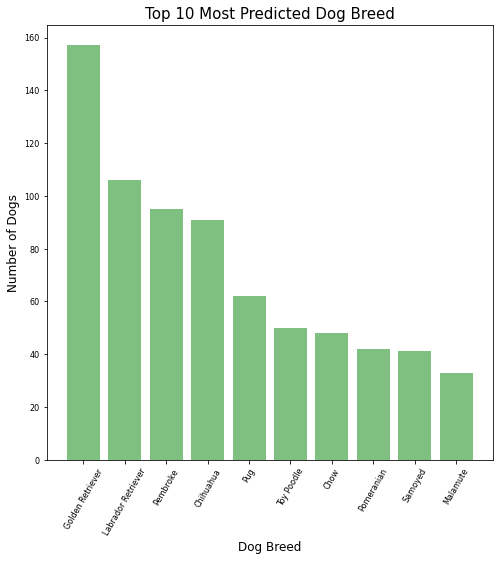

In [107]:
# plotting a barchart to visualise top 10 predicted dog breed
plt.subplots(figsize = (8,8))
plt.bar(breed10.index, breed10, color = 'g', alpha = .5)

# Defining the plot title, labels and fontsize of both axis
plt.title('Top 10 Most Predicted Dog Breed', fontsize=15)
plt.xlabel('Dog Breed', fontsize=12)
plt.ylabel('Number of Dogs', fontsize=12)
plt.xticks(fontsize = 8, rotation = 60)
plt.yticks(fontsize=8);

> #### INSIGHT 2:

Most populated dog stage

In [108]:
# Grouping by dog stage to compute the most populated dog stage

dogstage = combined_df['dog_stage'].value_counts()
dogstage = dogstage.reset_index(name = 'dogs').sort_values(by = 'dogs', ascending = False)
dogstage

,index,dogs
0,pupper,203
1,doggo,62
2,puppo,22
3,"doggo, pupper",9
4,floofer,7
5,"doggo, puppo",1
6,"doggo, floofer",1


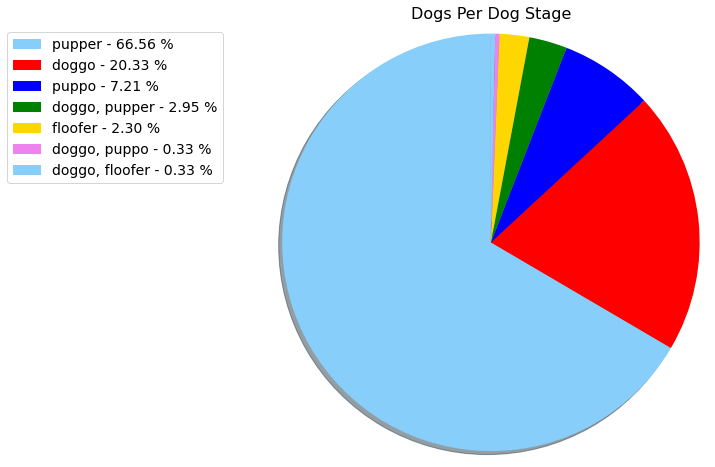

In [109]:
## Adding a legend to the chart and increasing its size 
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold', 'violet'] 
plt.subplots(figsize = [8, 8])

percent = 100.*dogstage.dogs/dogstage.dogs.sum()
patches, texts = plt.pie(dogstage.dogs, colors=colors, startangle=90, radius=1.2, shadow = True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(dogstage['index'], percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, dogstage.dogs),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=14)

plt.savefig('piechart.png', bbox_inches='tight')
plt.title('Dogs Per Dog Stage', fontsize = 16);

> #### INSIGHT 3:
Dog breed with the highest average ratings and favorite count.

In [110]:
# Grouping by dog breed per average ratings

breed_rat = combined_df.groupby('predicted_breed')['rating'].mean().sort_values(ascending = False)
breed_rat = breed_rat.sort_values(ascending = False)[:10]
breed_rat

predicted_breed
Bouvier Des Flandres    1.300000
Saluki                  1.250000
Briard                  1.233333
Tibetan Mastiff         1.225000
Border Terrier          1.214286
Silky Terrier           1.200000
Standard Schnauzer      1.200000
Gordon Setter           1.175000
Irish Setter            1.175000
Samoyed                 1.173171
Name: rating, dtype: float64

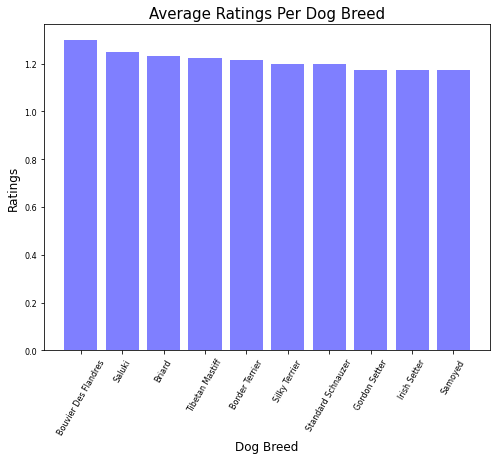

In [111]:
# plotting a barchart to visualise top dog breed with the highest ratings
plt.subplots(figsize = (8,6))
plt.bar(breed_rat.index, breed_rat, color = 'b', alpha = .5)

# Defining the plot title, labels and fontsize of both axis
plt.title('Average Ratings Per Dog Breed', fontsize=15)
plt.xlabel('Dog Breed', fontsize=12)
plt.ylabel('Ratings', fontsize=12)
plt.xticks(fontsize = 8, rotation = 60)
plt.yticks(fontsize=8);

In [112]:
# Grouping by predicted breed per average favorite_count

breed_count = combined_df.groupby('predicted_breed')['favorite_count'].mean().sort_values(ascending=False)
breed_count = breed_count.sort_values(ascending = False)[:10]
breed_count

predicted_breed
Bedlington Terrier         22828.500000
Saluki                     21935.750000
French Bulldog             18522.700000
Bouvier Des Flandres       16254.000000
Afghan Hound               15570.333333
Black-And-Tan Coonhound    15457.000000
Flat-Coated Retriever      15288.000000
Irish Water Spaniel        14776.333333
Leonberg                   13399.333333
Whippet                    13332.272727
Name: favorite_count, dtype: float64

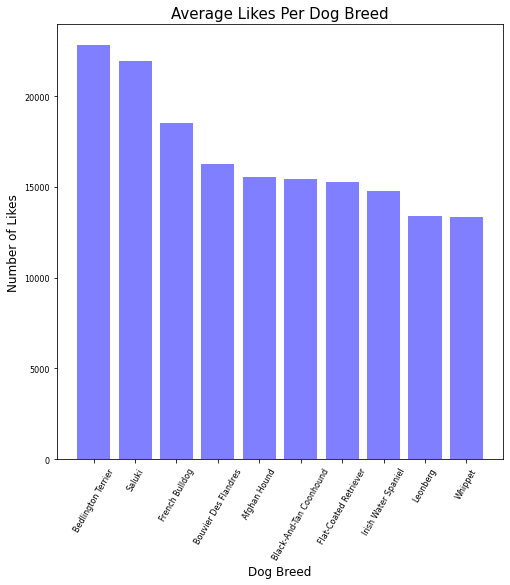

In [113]:
# plotting a barchart to visualise top 10 dog breedwith highest favorite counts
plt.subplots(figsize = (8,8))
plt.bar(breed_count.index, breed_count, color = 'b', alpha = .5)

# Defining the plot title, labels and fontsize of both axis
plt.title('Average Likes Per Dog Breed', fontsize=15)
plt.xlabel('Dog Breed', fontsize=12)
plt.ylabel('Number of Likes', fontsize=12)
plt.xticks(fontsize = 8, rotation = 60)
plt.yticks(fontsize=8);

> #### INSIGHT 4:
Dog stage with the highest likes and ratings

In [114]:
# Grouping by dog stage per average favorite count

stage_rat = combined_df.groupby('dog_stage')['rating'].mean()
stage_rat = stage_rat.reset_index(name = 'ratings').sort_values(by = 'ratings', ascending = False)
stage_rat

,dog_stage,ratings
3,"doggo, puppo",1.300000
6,puppo,1.200000
4,floofer,1.200000
0,doggo,1.187097
1,"doggo, floofer",1.100000
2,"doggo, pupper",1.100000
5,pupper,1.063680


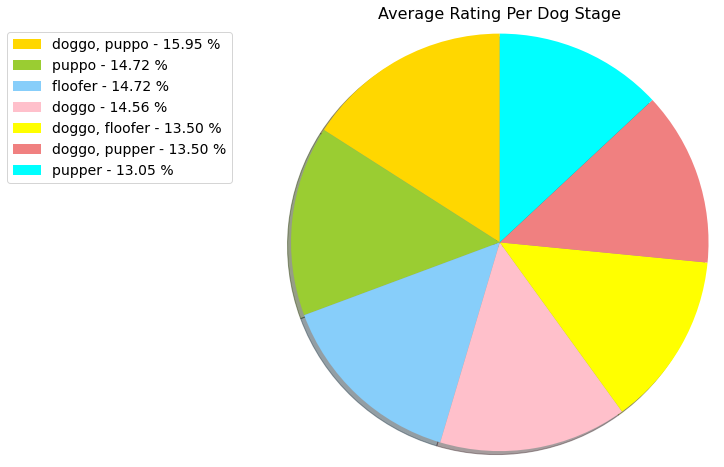

In [115]:
# Plotting a pie chart to show the ratings per dog stage 
colors = ['gold','yellowgreen', 'lightskyblue','pink','yellow','lightcoral','cyan'] 
plt.subplots(figsize = [8, 8])

percent = 100.*stage_rat.ratings/stage_rat.ratings.sum()
patches, texts = plt.pie(stage_rat.ratings, colors=colors, startangle=90, radius=1.2, shadow = True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(stage_rat['dog_stage'], percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, stage_rat.ratings),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=14)

plt.savefig('piechart.png', bbox_inches='tight')
plt.title('Average Rating Per Dog Stage', fontsize = 16);

In [116]:
# Grouping by dog stage per average favorite count

stage_count = combined_df.groupby('dog_stage')['favorite_count'].mean()
stage_count = stage_count.reset_index(name = 'counts').sort_values(by = 'counts', ascending = False)
stage_count

,dog_stage,counts
3,"doggo, puppo",43951.000000
6,puppo,20675.363636
0,doggo,18629.112903
1,"doggo, floofer",15659.000000
2,"doggo, pupper",12367.222222
4,floofer,11885.000000
5,pupper,6575.931034


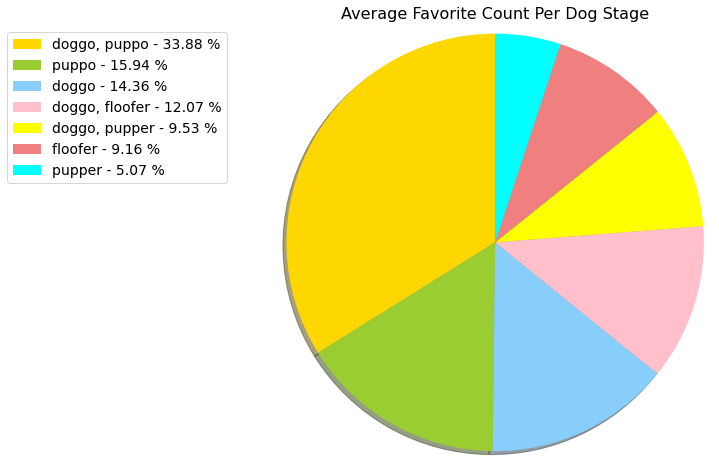

In [117]:
# Adding a legend to the chart and increasing its size 
colors = ['gold','yellowgreen', 'lightskyblue','pink','yellow','lightcoral','cyan'] 
plt.subplots(figsize = [8, 8])

percent = 100.* stage_count['counts'] / stage_count['counts'].sum()
patches, texts = plt.pie(stage_count.counts, colors=colors, startangle=90, radius=1.2, shadow = True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(stage_count['dog_stage'], percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, stage_count.counts),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=14)

plt.savefig('piechart.png', bbox_inches='tight')
plt.title('Average Favorite Count Per Dog Stage', fontsize = 16);

> #### INSIGHT 5:
Do dogs with have higher ratings have more likes

In [133]:
# Grouping by rating per average favorite count
rating_count = combined_df.groupby('rating')['favorite_count'].mean()
rating_count

rating
0.000000      2863.000000
0.100000      6411.500000
0.200000      2205.000000
0.300000      2129.421053
0.400000      2453.466667
0.500000      2277.939394
0.600000      2428.781250
0.636364     36080.000000
0.700000      2702.862745
0.800000      2193.326316
0.818182     34460.000000
0.900000      2172.973510
0.975000     18307.000000
1.000000      3690.902381
1.100000      6170.164179
1.126000      1681.000000
1.127000      6543.000000
1.200000     10348.893805
1.300000     21115.587549
1.350000     42408.000000
1.400000     26643.028571
42.000000    23397.000000
Name: favorite_count, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


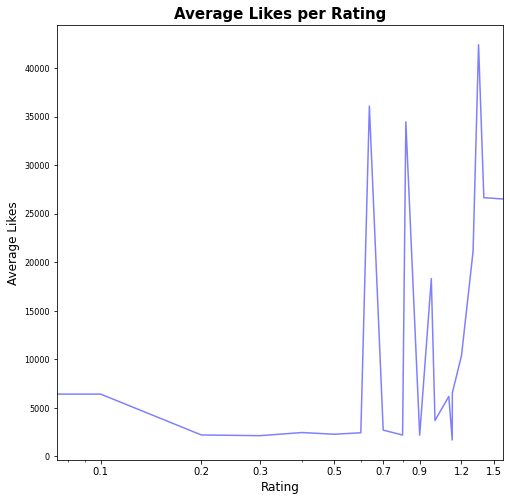

In [146]:
# Using a lineplot to view the relationship or trend between the average rating and favorite  count
plt.subplots(figsize = (8,8))
plt.plot(rating_count, color = 'b', alpha = .5)

# Defining plot title, labels and fontsize of both axis
plt.title('Average Likes per Rating', weight = 'bold', fontsize = 15)
plt.xlabel('Rating', fontsize=12)
plt.xscale('log')
ticks = [0.1, 0.2, 0.3,  0.5, 0.7, 0.9, 1.2, 1.5]
plt.ylabel('Average Likes', fontsize=12)
plt.xticks(ticks, ticks)
plt.xlim(0.0 , 1.6)
plt.yticks(fontsize=8);

### Conclusion

> * `Golden Retriever` is the most predicted dog breed.
> * The most populated dog stage is the `pupper` stage.
> * `Doggo, Fluffer` and `Doggoe, Pupper` stages are populated with the same percentage of dogs.
> * `Bouvier Des Flandres` breed has the highest percentage of average ratings 
> * `Bedington Terrier` has the highest percentage of likes (favorite count).
> * `Doggo, Puppo` stage has the highest percentage of average ratings and favorite count.
> * The trend between `Ratings` and average `Favorite count` varies. Dogs with ratings between 0.2 and 0.9 tend to have an average favorite count less than 5000 while dogs with ratings from 0.9 and above tend to have a very large number of favorite count.